<a href="https://colab.research.google.com/github/Ronalde-web/ATIVIDADE-JUPYTER/blob/main/Modelo_Regress%C3%A3o_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SOLUÇÕES EM CIÊNCIA DE DADOS APLICADA 1
##Aluno: Ronalde Gonçalves da Silva Neto
##Prof: Thyago Maia

#ETAPA-3

In [320]:
# IMPORTANDO AS BIBLIOTECAS
import pandas as pd
import os
import glob

In [321]:
# instalando o scikit-learn local
pip install 'scikit-learn'

In [322]:
# LENDO MEU DATASET
dados = pd.read_csv('/content/ford.csv')

In [323]:
# VENDO AS LINHAS E COLUNAS DO MEU DATASET
dados.shape

(17966, 9)

In [324]:
# vendo os 5 primeiros resultados
dados.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [325]:
# MUDANDO OS NOMES DAS COLUNAS 
dados.rename(columns={'model': 'Modelo', 'year': 'Ano', 'price': 'Preco', 'transmission': 'transmissao', 'mileage': 'KM_Rodado', 'fuelType': 'Tipo_combustivel',
'tax': 'Imposto', 'mpg': 'Autonomia', 'engineSize': 'Motor'}, inplace = True)

In [326]:
# criando uma nova coluna com as condições.
# estou classificando se um carro é novo ou não de acordo com a sua quilometragem
# classificando os carros Semi_Novo
dados.loc[dados['KM_Rodado'] >= 9000, 'situacao'] = 'Semi_Novo'

In [327]:
# classificando os carros novos
dados.loc[dados['KM_Rodado'] < 9000, 'situacao'] = 'Novo'

In [328]:
# Dando uma verificada no meu dataset
# as 8 primeiras linhas
dados.head(8)

,Modelo,Ano,Preco,transmissao,KM_Rodado,Tipo_combustivel,Imposto,Autonomia,Motor,situacao
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,Semi_Novo
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,Semi_Novo
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,Semi_Novo
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,Semi_Novo
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,Novo
5,Fiesta,2015,10500,Manual,35432,Petrol,145,47.9,1.6,Semi_Novo
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0,Novo
7,Fiesta,2017,9000,Manual,13054,Petrol,145,54.3,1.2,Semi_Novo


In [329]:
# Criando uma nova variavel
dados1 = dados

In [330]:
# VENDO OS 5 PRIMEIROS DADOS
dados1.head()

,Modelo,Ano,Preco,transmissao,KM_Rodado,Tipo_combustivel,Imposto,Autonomia,Motor,situacao
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,Semi_Novo
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,Semi_Novo
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,Semi_Novo
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,Semi_Novo
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,Novo


In [331]:
# VERIFICANDO OS FORMATOS DAS COLUNAS
dados1.dtypes

Modelo               object
Ano                   int64
Preco                 int64
transmissao          object
KM_Rodado             int64
Tipo_combustivel     object
Imposto               int64
Autonomia           float64
Motor               float64
situacao             object
dtype: object

In [332]:
# VERIFICAR OS CAMPOS NULOS 
# E SOMAR OS DADOS NULOS

dados1.isnull().sum()

Modelo              0
Ano                 0
Preco               0
transmissao         0
KM_Rodado           0
Tipo_combustivel    0
Imposto             0
Autonomia           0
Motor               0
situacao            0
dtype: int64

In [333]:
# ESCOLHENDO AS COLUNAS QUE VAI SER USADO NA REGRESSÃO LOGISTICA
base = dados1.loc[:,['Ano', 'Preco', 'transmissao','Tipo_combustivel', 'situacao']] 

In [334]:
# VERIFICANDO OS 5 PRIMEIROS RESULTADOS DAS COLUNAS SELECIONADOS
base.head()

,Ano,Preco,transmissao,Tipo_combustivel,situacao
0,2017,12000,Automatic,Petrol,Semi_Novo
1,2018,14000,Manual,Petrol,Semi_Novo
2,2017,13000,Manual,Petrol,Semi_Novo
3,2019,17500,Manual,Petrol,Semi_Novo
4,2019,16500,Automatic,Petrol,Novo


In [335]:
# VERIFICANDO AS LINHAS E COLUNAS DAS COLUNAS ESCOLHIDAS
base.shape

(17966, 5)

In [336]:
# ANALISANDO OS DADOS DA COLUNA ('situacao')
base.groupby(['situacao']).size()

situacao
Novo          3918
Semi_Novo    14048
dtype: int64

In [337]:
# ATRIBUINDO OS DADOS ATUALIZADOS PARA UMA NOVA VARIAVEL ('base1')
base1 = base

In [338]:
# criando a coluna booleanos
base1['situacao2'] = base1['situacao'] == 'Novo'

In [339]:
# VERIFICANDO A MUDANÇA NOS DADOS
# e tbm, vendo o tipo bool na coluna situacao2
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ano               17966 non-null  int64 
 1   Preco             17966 non-null  int64 
 2   transmissao       17966 non-null  object
 3   Tipo_combustivel  17966 non-null  object
 4   situacao          17966 non-null  object
 5   situacao2         17966 non-null  bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 719.5+ KB


In [340]:
# importando as outras bibliotecas 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [341]:
from sklearn.metrics import mean_squared_error, r2_score

In [342]:
# verificando os dados 
base1.head()

,Ano,Preco,transmissao,Tipo_combustivel,situacao,situacao2
0,2017,12000,Automatic,Petrol,Semi_Novo,False
1,2018,14000,Manual,Petrol,Semi_Novo,False
2,2017,13000,Manual,Petrol,Semi_Novo,False
3,2019,17500,Manual,Petrol,Semi_Novo,False
4,2019,16500,Automatic,Petrol,Novo,True


In [344]:
# importando as bibliotecas
from sklearn.model_selection import train_test_split

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

In [346]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn import tree 
import matplotlib.pyplot as plt;

In [347]:
from sklearn.linear_model import LogisticRegression

In [348]:
# TROCANDO OS VALORES DA COLUNA ('transmissao') DE OBJECT PARA INT

base1['transmissao'].replace({'Automatic': 1, 'Manual': 2, 'Semi-Auto': 3}, regex=True, inplace=True)

In [349]:
# TROCANDO OS VALORES DA COLUNA ('Tipo_combustivel') DE OBJECT PARA INT

base1['Tipo_combustivel'].replace({'Diesel': 1, 'Electric': 2, 'Hybrid': 3, 'Other' : 4, 'Petrol' : 5}, regex=True, inplace=True)

In [350]:
# separando as colunas que serão usadas e os grupos de (train e test), dos dados.
x = base1[['Ano', 'Preco', 'transmissao', 'Tipo_combustivel']].values
y = base1['situacao2'].values

In [351]:
# criando os dados para os testes - train e test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [352]:
# agrupando os dados da minha coluna transmissao.
base1.groupby(['transmissao']).size()

transmissao
1     1361
2    15518
3     1087
dtype: int64

In [353]:
# agrupando os dados da minha coluna Tipo_combustivel.
base1.groupby(['Tipo_combustivel']).size()

Tipo_combustivel
1     5762
2        2
3       22
4        1
5    12179
dtype: int64

In [355]:
# testando o model1, usando(train)
model1 = LogisticRegression()
model1.fit(x_train, y_train)
print ('Acurácia: ', model1.score(x_train, y_train))

Acurácia:  0.8097818019890158


In [356]:
# testando o model1, usando (test)
model1 = LogisticRegression()
model1.fit(x_test, y_test)
print ('Acurácia: ', model1.score(x_test, y_test))

Acurácia:  0.81233303650935


In [357]:
# vendo a predição do modelo.
y_previstos = model1.predict(x_test)

print('Acurácia:', model1.score(x_test, y_test))
print('Precisão:', precision_score(y_test, y_previstos))
print('Recall:', recall_score(y_test, y_previstos))

Acurácia: 0.81233303650935
Precisão: 0.6266666666666667
Recall: 0.33709016393442626


In [361]:
# usando a avore de decisão
modelo1 = DecisionTreeClassifier(max_depth=20, max_leaf_nodes=13, min_samples_leaf=1)
modelo1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=13)

In [363]:
# vendo a Acuracia do modelo1
print('Acurácia do modelo1:', modelo1.score(x_train, y_train))

Acurácia do modelo1: 0.8618079263767255


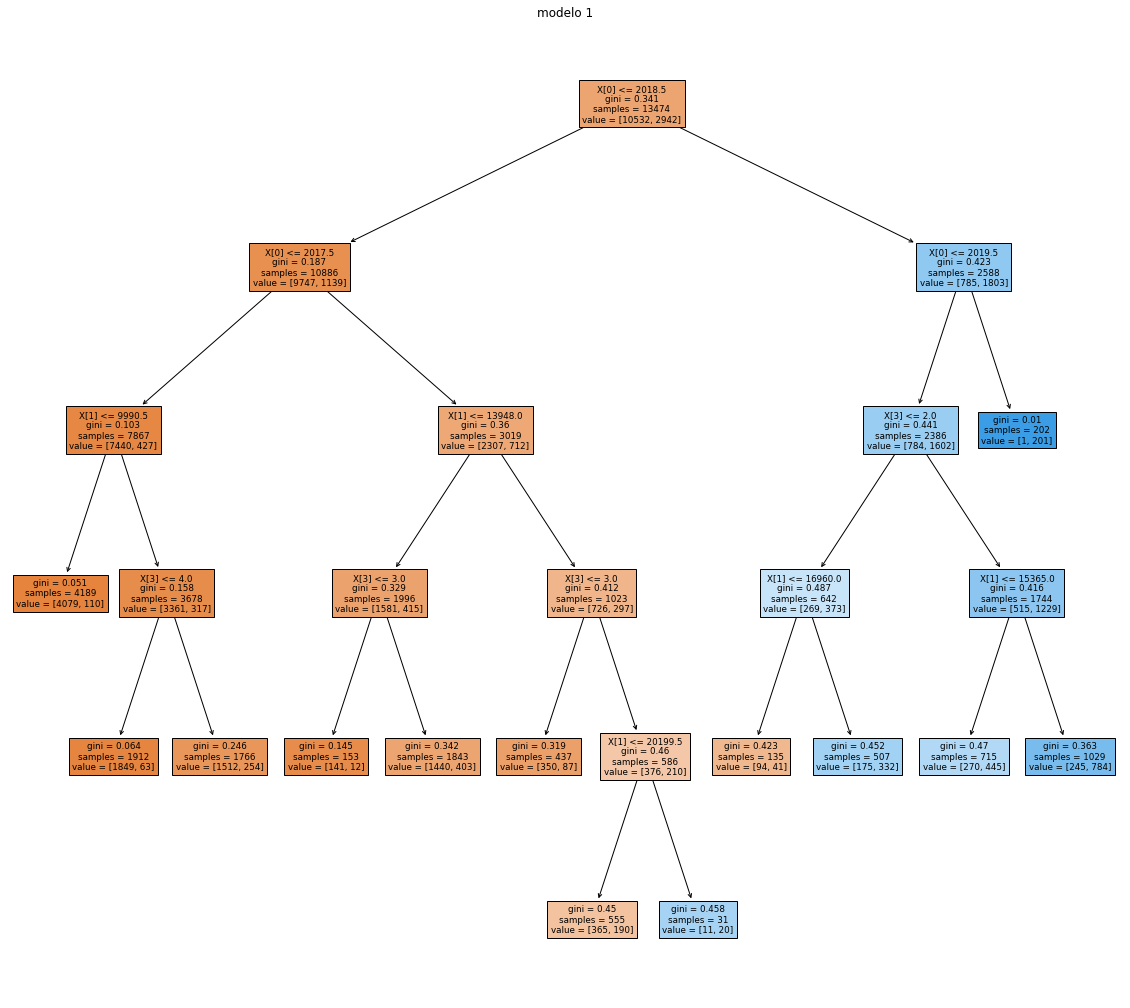

In [365]:
# modelo1 na Avore de Decisão
fig = plt.figure(figsize=(20,18))
plot_tree(modelo1, filled = True)
plt.title('modelo 1')
plt.show()

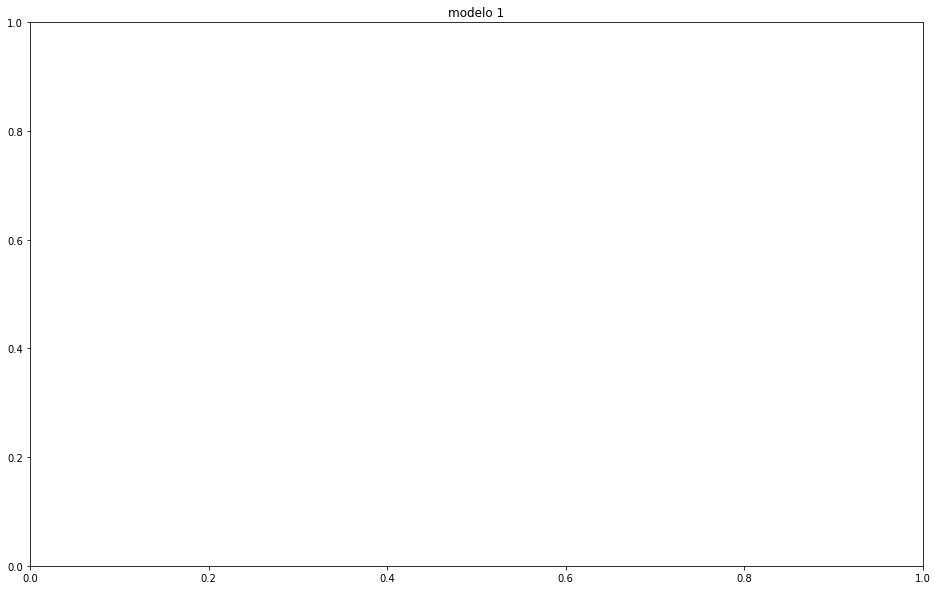

In [360]:
fig = plt.figure(figsize=(16,10))
plt.title('modelo 1')
plt.show()